<a href="https://colab.research.google.com/github/tintin75011/Pythorch-course/blob/main/pytoch_tuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



[ **00. PyTorch Fundamentals**](https://www.learnpytorch.io/00_pytorch_fundamentals/)


---




Importing PyTorch

In [ ]:
import torch
torch.__version__

'2.9.0+cpu'

**Introduction to tensors**

Creating tensors

In [ ]:
# Scalar
scalar = torch.tensor(7)
print(scalar)
print(scalar.ndim) # Print the dimension of the scalar
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()


tensor(7)
0
scalar.tiem() = 7


In [ ]:
# A vector is a single dimension tensor but can contain many numbers.
vector = torch.tensor([4,7])
print(vector)

print(vector.ndim)
# You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside ([) and you only need to count one side.

# Check shape of vector
# The shape tells you how the elements inside them are arranged.
print(vector.shape)

tensor([4, 7])
1
torch.Size([2])


In [ ]:
matrix = torch.tensor([[4,7],[8,5]])
print(matrix)
print(matrix.ndim)
print(matrix.shape) #We get the output torch.Size([2, 2]) because MATRIX is two elements deep and two elements wide.

tensor([[4, 7],
        [8, 5]])
2
torch.Size([2, 2])


In [ ]:
matrix2 = torch.tensor([[[4, 7,8], [8,6,2],[7,4,6]]])
print(matrix2)
matrix2.ndim

tensor([[[4, 7, 8],
         [8, 6, 2],
         [7, 4, 6]]])


3

![image.png](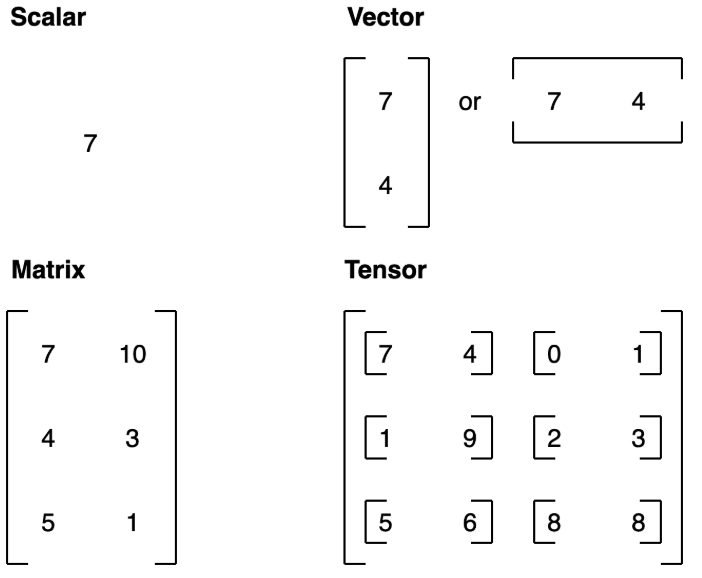)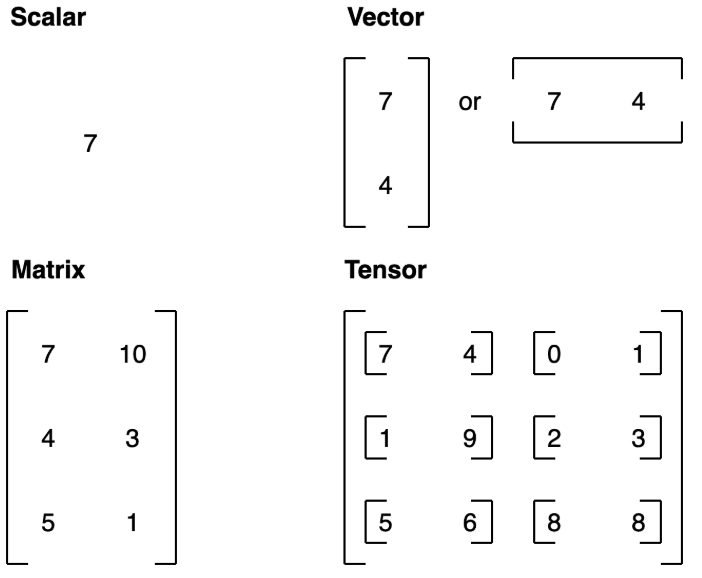

In [ ]:
#Random tensors
random_tensor = torch.rand(size=(3,4))
print(random_tensor)
print(random_tensor.dtype)
random_tensor.ndim

#Random tensor as image
random_image_tensor = torch.rand(size=(224,224,3))
print(random_image_tensor.shape)
print(random_image_tensor.ndim)

tensor([[0.0282, 0.2731, 0.6664, 0.7602],
        [0.9892, 0.7467, 0.1133, 0.8967],
        [0.5607, 0.8406, 0.7070, 0.7579]])
torch.float32
torch.Size([224, 224, 3])
3


In [ ]:
# Zeros and ones
zeros = torch.zeros(size=(3,4)) #size=(3,4) == [3,4]
zeros2 = torch.zeros([3,4])
ones = torch.ones(size=(3,4))

print(zeros)
print(zeros2)
print(ones)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
zero_to_ten = torch.arange(0,10,1)
print(zero_to_ten)

zeros_same_size = torch.zeros_like(input = zero_to_ten)
print(zeros_same_size)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Tensor datatypes

In [ ]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

print(float_32_tensor.shape)
print(float_32_tensor.dtype)
print(float_32_tensor.device)


float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

print(float_16_tensor.shape)
print(float_16_tensor.dtype)
print(float_16_tensor.device)


torch.Size([3])
torch.float32
cpu
torch.Size([3])
torch.float16
cpu


Getting information from tensors

In [ ]:
some_tensor = torch.rand([5,5])
print(some_tensor)
print(f"shape of teh tensor : {some_tensor.shape}")
print(f"dtype of the tensor : {some_tensor.dtype}")
print(f"device of the tensor : {some_tensor.device}")

#Note: When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "what, what, where":
#"what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where"

tensor([[0.1415, 0.2276, 0.8359, 0.5112, 0.6580],
        [0.7628, 0.6593, 0.4200, 0.7830, 0.6278],
        [0.6214, 0.3944, 0.1204, 0.6494, 0.9500],
        [0.5734, 0.0290, 0.9020, 0.8142, 0.9842],
        [0.8646, 0.7459, 0.7642, 0.4467, 0.5460]])
shape of teh tensor : torch.Size([5, 5])
dtype of the tensor : torch.float32
device of the tensor : cpu


Manipulating tensors (tensor operations)

In [ ]:
#Basic operations
tensor = torch.tensor([10,20,30])
tensor += 10
print(tensor)

tensor = torch.tensor([10,20,30])
tensor *= 10
print(tensor)

tensor1 = torch.tensor([10,10,10])
tensor2 = torch.tensor([5,10,15])

tensor3 = torch.multiply(tensor1,tensor2)
print(tensor3)

tensor([20, 30, 40])
tensor([100, 200, 300])
tensor([ 50, 100, 150])


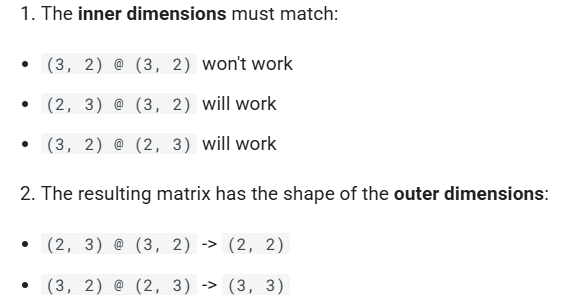

In [ ]:

tensor1 = torch.tensor([10,10,10])
tensor2 = torch.tensor([5,10,15])

print(tensor1 * tensor2)
print(torch.matmul(tensor1,tensor2))
print(tensor1 @ tensor2)

tensor([ 50, 100, 150])
tensor(300)
tensor(300)


One of the most common errors in deep learning (shape errors)

In [ ]:
#RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

print(tensor_B.T)

# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")


# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)


#http://matrixmultiplication.xyz/

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [ ]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)


# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


Positional min/max

In [ ]:
x = torch.arange(0,100,10)

print(f"max : {x.max()}")
print(f"min : {x.min()}")
print(f"mean : {x.type(torch.float32).mean()}")
print(f"Sum : {x.sum()}")

torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

print(f"min position : {x.argmin()}")
print(f"max position : {x.argmax()}")


max : 90
min : 0
mean : 45.0
Sum : 450
min position : 0
max position : 9


Change tensor datatype

In [ ]:
tensor = torch.arange(10.,100.,10.)
tensor.dtype

tensor_float16 = tensor.type(torch.float16)
tensor_float16

# Create an int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

In [ ]:

tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)
torch.reshape(tensor_A, (2,3))

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
# Create a tensor

x = torch.arange(1., 8.)
z = torch.arange(2., 9.)

print(f"x : {x}")
print(f"x shape {x.shape}")
#add an extra dimension
x_reshaped = x.reshape(1,7)
print(f"x_reshape : {x_reshaped}")
print(f"x_reshape shape {x_reshaped.shape}")

#change de view
x_changedview = x.view(1,7)
print(f"x_changedview : {x_changedview}")
print(f"x_changedview shape {x_changedview.shape}")

#Remember though, changing the view of a tensor with torch.view() really only creates a new view of the same tensor.
# Changing z changes x
x_changedview[:, 0] = 5
x_changedview, x

# Stack tensors on top of each other
x_stacked = torch.stack([x, z, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked


#How about removing all single dimensions from a tensor?
print(f"\nPrevious tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")


print(f"\nPrevious tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

# Create tensor with specific shape
x_original = torch.rand(size=(224,224,3))
x_original.shape
x_permuted = x_original.permute(2,1,0)
x_permuted.shape


x : tensor([1., 2., 3., 4., 5., 6., 7.])
x shape torch.Size([7])
x_reshape : tensor([[1., 2., 3., 4., 5., 6., 7.]])
x_reshape shape torch.Size([1, 7])
x_changedview : tensor([[1., 2., 3., 4., 5., 6., 7.]])
x_changedview shape torch.Size([1, 7])

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


3


Indexing (selecting data from tensors)

In [ ]:
x = torch.arange(1,10)
x, x.shape, x.ndim

x = x.reshape(1,3,3)
x.shape, x.ndim
print(x)
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :] # same as x[0][0]

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


tensor([1])

PyTorch tensors & NumPy

In [ ]:
# NumPy array to tensor     #torch.from_numpy(array).type(torch.float32)
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

x = torch.ones(10)
numpytensor = x.numpy()
numpytensor

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

Reproducibility (trying to take the random out of random)

In [ ]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.5315, 0.1587, 0.6542, 0.3278],
        [0.6532, 0.3958, 0.9147, 0.2036],
        [0.2018, 0.2018, 0.9497, 0.6666]])

Tensor B:
tensor([[0.9811, 0.0874, 0.0041, 0.1088],
        [0.1637, 0.7025, 0.6790, 0.9155],
        [0.2418, 0.1591, 0.7653, 0.2979]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

# **Exercices **

1 - Create a random tensor with shape (7, 7).

2 - Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).

3 - Set the random seed to 0 and do exercises 2 & 3 over again.

4 - Speaking of random seeds, we saw how to set it with torch.manual_seed() but is there a GPU equivalent? (hint: you'll need to look into the documentation for torch.cuda for this one). If there is, set the GPU random seed to 1234.

5 - Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).

6 - Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).

7 - Find the maximum and minimum values of the output of 7.

8 - Find the maximum and minimum index values of the output of 7.

9 - Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10).

10 - Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

In [19]:
import torch
import numpy as np
# question 1 :
myTensor = torch.rand(size=(7,7))
# Question 2 :
mySecondTensor = torch.rand([1,7])
#Question 3 :
res = np.matmul(myTensor,mySecondTensor.T)
#Question 4 :
torch.manual_seed(0)
firstTensor = torch.rand([7,7])
secondTensor = torch.rand([1,7])
res = np.matmul(firstTensor,secondTensor.T)
res

/tmp/ipython-input-1271392853.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  res = np.matmul(myTensor,mySecondTensor.T)
/tmp/ipython-input-1271392853.py:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  res = np.matmul(firstTensor,secondTensor.T)


tensor([[1.8542],
        [1.9611],
        [2.2884],
        [3.0481],
        [1.7067],
        [2.5290],
        [1.7989]])